In [1]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("../gtsam/data_collection/Extracted_data_from_bag_files/pose_data_sdp_look_two_3_maker.csv", delimiter=',',skip_header=1)

In [3]:
x = data[:,0]
y = data[:,1]

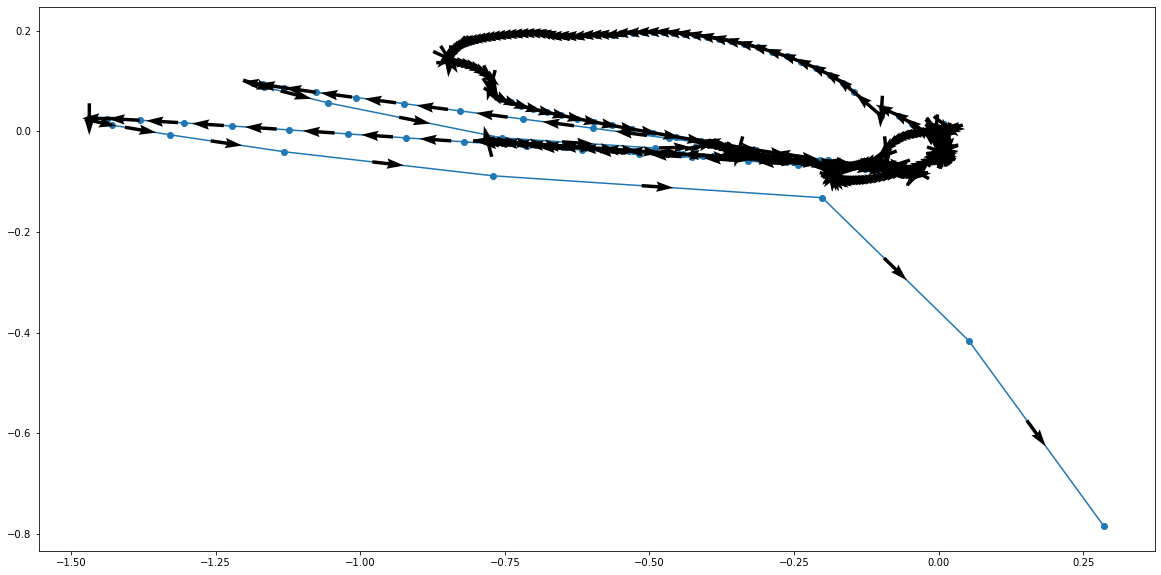

In [5]:
df = pd.DataFrame.from_dict({'x' : x,
                             'y' : y})
x = df['x'].values
y = df['y'].values

u = np.diff(x)
v = np.diff(y)
pos_x = x[:-1] + u/2
pos_y = y[:-1] + v/2
norm = np.sqrt(u**2+v**2) 

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x,y, marker="o")
ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid")
plt.show()

fig.savefig("image_name", format='svg', dpi=1200)